# Data Set Information:


Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).



Attribute Information:

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

##  Name              / Data Type  / Measurement Unit / Description

Sex                   / nominal    / --               / M, F, and I (infant)

Length                / continuous / mm               / Longest shell measurement

Diameter              / continuous / mm               / perpendicular to length

Height                / continuous / mm               / with meat in shell

Whole weight          / continuous / grams            / whole abalone

Shucked weight        / continuous / grams            / weight of meat

Viscera weight        / continuous / grams            / gut weight (after bleeding)

Shell weight          / continuous / grams            / after being dried

Rings                 / integer    / --               / +1.5 gives the age in years


In [48]:
#importing libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from statistics import mean
from sklearn.metrics import accuracy_score, explained_variance_score

import warnings as wrn
wrn.filterwarnings("ignore")

### Reading the csv dataset and choosing features data column and tartget column. 


In [49]:
#importing csv and seperating into X and y
df = pd.read_csv("abalone.csv")

#dividing X and y
X = df[["Sex", "Length", "Diameter", "Height", "Whole_weight", "Meat_weight", "Gut_weight", "Shell_weight"]]
y = df[["Age"]]
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Meat_weight,Gut_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


### Checking missing values, dtypes & noise in data via df.info()

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex             4177 non-null object
Length          4177 non-null float64
Diameter        4177 non-null float64
Height          4177 non-null float64
Whole_weight    4177 non-null float64
Meat_weight     4177 non-null float64
Gut_weight      4177 non-null float64
Shell_weight    4177 non-null float64
Age             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


### No null value found, Label Encoding is required for Sex data-column , no noise found

### Label Encoding 'Sex'

In [51]:
#label encoding sex
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

## Visualizing the numerical data columns

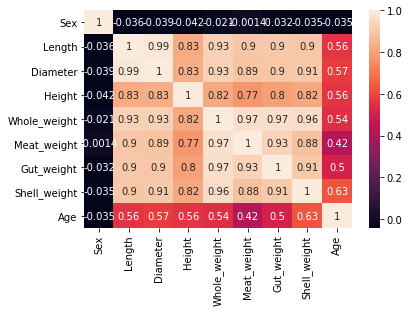

In [52]:
#using heatmap
# %matplotlib qt
numerical_features = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numerical_features].corr(), annot=True)

### Removing data columns having threshold corr() value less than 0.5

In [53]:
#droping useless features
X = X.drop(["Sex","Meat_weight"], axis = 1)  

### Training and predicting using Random forest Classifier and Regressor

In [54]:
#modelling Random Forest Classifier
#train Test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 20)
rfc = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rfc.fit(train_x, train_y)
pred = rfc.predict(test_x)
accuracy_score(test_y, pred)

0.35

In [55]:
#modelling Random Forest Regressor
#train Test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 20)
rfc = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
rfc.fit(train_x, train_y)
pred = rfc.predict(test_x)
explained_variance_score(y_true=test_y, y_pred=pred)

0.5315812033582092

### Possible Reason for the bad accuracy - we are trying to predict to the precise age which ranges from 1 - 29
### Soluton : Breaking Age to range of 5 will decrease classes from 29 to 6

In [56]:
df['Age1'] = np.where(((df['Age'] > 0) & (df['Age'] <= 5)), 1,0)
df['Age2'] = np.where(((df['Age'] > 5) & (df['Age'] <=10)), 2,0)
df['Age3'] = np.where(((df['Age'] > 10) & (df['Age'] <= 15)), 3,0)
df['Age4'] = np.where(((df['Age'] > 15) & (df['Age'] <= 20)), 4,0)
df['Age5'] = np.where(((df['Age'] > 20) & (df['Age'] <= 25)), 5,0)
df['Age6'] = np.where(((df['Age'] > 25) & (df['Age'] <= 30)), 6,0)

In [57]:
df.drop('Age', axis=1)
df['Age'] = df['Age1'] + df['Age2'] + df['Age3'] + df['Age4'] + df['Age5'] + df['Age6']
df

,Sex,Length,Diameter,Height,Whole_weight,Meat_weight,Gut_weight,Shell_weight,Age,Age1,Age2,Age3,Age4,Age5,Age6
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3,0,0,3,0,0,0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2,0,2,0,0,0,0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2,0,2,0,0,0,0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2,0,2,0,0,0,0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2,0,2,0,0,0,0
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2,0,2,0,0,0,0
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,4,0,0,0,4,0,0
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,4,0,0,0,4,0,0
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,2,0,2,0,0,0,0
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,4,0,0,0,4,0,0


### Removing the temporary age columns

In [58]:
tem = ['Age1', 'Age2', 'Age3', 'Age4', 'Age5', 'Age6']
df.drop(tem, axis=1)

,Sex,Length,Diameter,Height,Whole_weight,Meat_weight,Gut_weight,Shell_weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,2
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,2
5,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,2
6,0,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,4
7,0,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,4
8,2,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,2
9,0,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,4


### Training and Testing with Random forest Regressor and Classifier

In [63]:
#modelling Random Forest Classifier
#train Test split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 20)
rfc = RandomForestClassifier()
rfc.fit(train_x, train_y)
pred = rfc.predict(test_x)
accuracy_score(test_y, pred)

0.45

In [64]:
#modelling Random Forest Regressor
#train Test split
rfc = RandomForestRegressor()
rfc.fit(train_x, train_y)
pred = rfc.predict(test_x)
explained_variance_score(y_true=test_y, y_pred=pred)

0.7757989296636085

## Not much improvment with classifier but huge improvement with regression algorithm

### Applying and testing other regression algorithms 

In [65]:
# modelling logistic Regressor
#train Test split
rfc = LogisticRegression()
rfc.fit(train_x, train_y)
pred = rfc.predict(test_x)
explained_variance_score(y_true=test_y, y_pred=pred)

0.46674311926605516

In [66]:
# modeling linear regression
rfc = LinearRegression()
rfc.fit(train_x, train_y)
pred = rfc.predict(test_x)
explained_variance_score(y_true=test_y, y_pred=pred)

0.7002910981454968

## Conclusion :
### Linear Regression has second best accuracy with score of 70.02 %
### Random forest Regression has  best accuracy with score of 77.57%